In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
from iris.coords import DimCoord
from iris.cube import Cube
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point


#from iris.experimental.regrid import regrid_weighted_curvilinear_to_rectilinear

import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import regionmask

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load mh amoc-pr regression coef

cube_cesm_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/CESM2_midHolocene.cvdp_data.1-700.nc', 'amoc_pr_regression_ann')

cube_ec_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc', 'amoc_pr_regression_ann') 

cube_fgoalsf3_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc', 'amoc_pr_regression_ann') 

cube_fgoalsg3_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_midHolocene.cvdp_data.627-1126.nc', 'amoc_pr_regression_ann') 

cube_giss_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc', 'amoc_pr_regression_ann')

cube_hadgem_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc', 'amoc_pr_regression_ann') 

cube_inm_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/INM-CM4-8_midHolocene.cvdp_data.1900-1999.nc', 'amoc_pr_regression_ann')

cube_ipsl_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc', 'amoc_pr_regression_ann') 

cube_mpi2_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MPI-ESM1-2-LR_midHolocene.cvdp_data.1001-1500.nc', 'amoc_pr_regression_ann')

cube_mri_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MRI-ESM2-0_midHolocene.cvdp_data.1951-2150.nc', 'amoc_pr_regression_ann')

cube_noresm2_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc', 'amoc_pr_regression_ann')

In [3]:
print(cube_hadgem_amoc_pr)

precipitation_flux / (mm/day/Sv)    (latitude: 144; longitude: 192)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Attributes:
          Conventions: CF-1.6
          NCO: 4.4.4
          comment: includes both liquid and solid phases
          history: 2019-06-20T23:25:57Z altered by CMOR: replaced missing value flag (-1.07374e+09)...
          notes: Data from HadGEM3-GC31-LL_midHolocene from 2250-2349
          original_name: mo: (stash: m01s05i216, lbproc: 128)
          source: NCAR Climate Analysis Section's Climate Variability Diagnostics Package...


In [3]:
# regridding

amoc_pr_cube=[cube_cesm_amoc_pr, cube_ec_amoc_pr, cube_fgoalsf3_amoc_pr, cube_fgoalsg3_amoc_pr, 
              cube_giss_amoc_pr, cube_hadgem_amoc_pr, cube_inm_amoc_pr, cube_ipsl_amoc_pr, 
              cube_mpi2_amoc_pr, cube_mri_amoc_pr, cube_noresm2_amoc_pr]

In [4]:
pmip4_modelname=['cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2']

In [5]:
sample_points_1 = [('latitude', np.linspace(-90,90,180)),
                   ('longitude',  np.linspace(0,360,360))]

In [6]:
for n in range (0, len(pmip4_modelname)):  
    globals()[pmip4_modelname[n]+'_amoc_pr_regrid'] = amoc_pr_cube[n].interpolate(sample_points_1, iris.analysis.Linear())

In [7]:
print(hadgem_amoc_pr_regrid)

precipitation_flux / (mm/day/Sv)    (latitude: 180; longitude: 360)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Attributes:
        Conventions                 'CF-1.6'
        NCO                         '4.4.4'
        comment                     'includes both liquid and solid phases'
        history                     '2019-06-20T23:25:57Z altered by CMOR: replaced missing value flag (-1.07374e+09) ...'
        notes                       'Data from HadGEM3-GC31-LL_midHolocene from 2250-2349'
        original_name               'mo: (stash: m01s05i216, lbproc: 128)'
        source                      "NCAR Climate Analysis Section's Climate Variability Diagnostics Package ..."


In [8]:
# load pi amoc-pr regression coef

pi_cube_cesm_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/CESM2_piControl.cvdp_data.701-1200.nc', 'amoc_pr_regression_ann')

pi_cube_ec_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc', 'amoc_pr_regression_ann') 

pi_cube_fgoalsf3_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_historical.cvdp_data.1850-1900.nc', 'amoc_pr_regression_ann') 

pi_cube_fgoalsg3_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_piControl.cvdp_data.200-699.nc', 'amoc_pr_regression_ann') 

pi_cube_giss_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc', 'amoc_pr_regression_ann')

pi_cube_hadgem_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc', 'amoc_pr_regression_ann') 

pi_cube_inm_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/INM-CM4-8_piControl.cvdp_data.1850-2380.nc', 'amoc_pr_regression_ann')

pi_cube_ipsl_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc', 'amoc_pr_regression_ann') 

pi_cube_mpi2_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MPI-ESM1-2-LR_piControl.cvdp_data.1850-2849.nc', 'amoc_pr_regression_ann')

pi_cube_mri_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MRI-ESM2-0_piControl.cvdp_data.1850-2550.nc', 'amoc_pr_regression_ann')

pi_cube_noresm2_amoc_pr = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_piControl.cvdp_data.1710-2100.nc', 'amoc_pr_regression_ann')

In [9]:
# regridding

pi_amoc_pr_cube=[pi_cube_cesm_amoc_pr, pi_cube_ec_amoc_pr, pi_cube_fgoalsf3_amoc_pr, pi_cube_fgoalsg3_amoc_pr, 
                 pi_cube_giss_amoc_pr, pi_cube_hadgem_amoc_pr, pi_cube_inm_amoc_pr, pi_cube_ipsl_amoc_pr, 
                 pi_cube_mpi2_amoc_pr, pi_cube_mri_amoc_pr, pi_cube_noresm2_amoc_pr]

In [10]:
for n in range (0, len(pmip4_modelname)):  
    globals()['pi_'+ pmip4_modelname[n]+'_amoc_pr_regrid'] = pi_amoc_pr_cube[n].interpolate(sample_points_1, iris.analysis.Linear())

In [11]:
max_amoc_30_diff=[0.30673027, 1.2563648,0.48369217, 0.7757225,  0.10418701, 1.3791008, -0.7268448, -0.5384302,   -0.00030136108, 2.2410336,  0.2731018]

### re-define [hadgem_amoc_pr_regrid_cube], as it has problems with coords

In [12]:
hadgem_amoc_pr_data=globals()[pmip4_modelname[5]+'_amoc_pr_regrid'].data
hadgem_lat_data=np.linspace(-90,90,180)
hadgem_lon_data=np.linspace(0,360,360)

In [13]:
longitude = DimCoord(hadgem_lon_data, standard_name='longitude', units='degrees')
latitude = DimCoord(hadgem_lat_data, standard_name='latitude', units='degrees')

hadgem_amoc_pr_regrid = Cube(hadgem_amoc_pr_data,dim_coords_and_dims=[(latitude, 0), (longitude, 1)])

In [14]:
print(hadgem_amoc_pr_regrid)

unknown / (unknown)                 (latitude: 180; longitude: 360)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x


In [15]:
pi_hadgem_amoc_pr_data=globals()['pi_'+ pmip4_modelname[5]+'_amoc_pr_regrid'].data
pi_hadgem_lat_data=np.linspace(-90,90,180)
pi_hadgem_lon_data=np.linspace(0,360,360)

In [16]:
longitude = DimCoord(pi_hadgem_lon_data, standard_name='longitude', units='degrees')
latitude = DimCoord(pi_hadgem_lat_data, standard_name='latitude', units='degrees')

pi_hadgem_amoc_pr_regrid = Cube(pi_hadgem_amoc_pr_data,dim_coords_and_dims=[(latitude, 0), (longitude, 1)])

In [17]:
print(pi_hadgem_amoc_pr_regrid)

unknown / (unknown)                 (latitude: 180; longitude: 360)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x


In [18]:
#delta PR(amoc30n)

for j in range (0, len(pmip4_modelname)): # hadgem cube has problems 
    globals()[pmip4_modelname[j]+'_pr_change_caused_by_amoc']=max_amoc_30_diff[j]*(globals()[pmip4_modelname[j]+'_amoc_pr_regrid'] + globals()['pi_'+ pmip4_modelname[j]+'_amoc_pr_regrid'])/2

In [19]:
# compute the ensemble mean of [delta PR(amoc30n)]

delta_pr_amoc_total=cesm_pr_change_caused_by_amoc.data + ec_pr_change_caused_by_amoc.data + fgoalsf3_pr_change_caused_by_amoc.data + fgoalsg3_pr_change_caused_by_amoc.data + giss_pr_change_caused_by_amoc.data + hadgem_pr_change_caused_by_amoc.data + inm_pr_change_caused_by_amoc.data + ipsl_pr_change_caused_by_amoc.data + mpi2_pr_change_caused_by_amoc.data + mri_pr_change_caused_by_amoc.data + noresm2_pr_change_caused_by_amoc.data
delta_pr_amoc_ave=delta_pr_amoc_total / 11

In [20]:
delta_pr_amoc_ave_1 = cesm_amoc_pr_regrid.copy(data=delta_pr_amoc_ave)

In [21]:
# load mh annual pr

cube_cesm_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/CESM2_midHolocene.cvdp_data.1-700.nc', 'pr_spatialmean_ann')

cube_ec_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc', 'pr_spatialmean_ann') 

cube_fgoalsf3_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc', 'pr_spatialmean_ann') 

cube_fgoalsg3_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_midHolocene.cvdp_data.627-1126.nc', 'pr_spatialmean_ann') 

cube_giss_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc', 'pr_spatialmean_ann')

cube_hadgem_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc', 'pr_spatialmean_ann') 

cube_inm_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/INM-CM4-8_midHolocene.cvdp_data.1900-1999.nc', 'pr_spatialmean_ann')

cube_ipsl_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc', 'pr_spatialmean_ann') 

cube_mpi2_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MPI-ESM1-2-LR_midHolocene.cvdp_data.1001-1500.nc', 'pr_spatialmean_ann')

cube_mri_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MRI-ESM2-0_midHolocene.cvdp_data.1951-2150.nc', 'pr_spatialmean_ann')

cube_noresm2_pr_ann= iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc', 'pr_spatialmean_ann')


In [22]:
# regridding

pr_ann_cube=[cube_cesm_pr_ann, cube_ec_pr_ann, cube_fgoalsf3_pr_ann, cube_fgoalsg3_pr_ann, 
              cube_giss_pr_ann, cube_hadgem_pr_ann, cube_inm_pr_ann, cube_ipsl_pr_ann, 
              cube_mpi2_pr_ann, cube_mri_pr_ann, cube_noresm2_pr_ann]

In [23]:
for n in range (0, len(pmip4_modelname)):  
    globals()[pmip4_modelname[n]+'_pr_ann_regrid'] = pr_ann_cube[n].interpolate(sample_points_1, iris.analysis.Linear())

In [24]:
hadgem_pr_ann_data=globals()[pmip4_modelname[5]+'_pr_ann_regrid'].data
hadgem_lat_data=np.linspace(-90,90,180)
hadgem_lon_data=np.linspace(0,360,360)

In [25]:
longitude = DimCoord(hadgem_lon_data, standard_name='longitude', units='degrees')
latitude = DimCoord(hadgem_lat_data, standard_name='latitude', units='degrees')

hadgem_pr_ann_regrid = Cube(hadgem_pr_ann_data,dim_coords_and_dims=[(latitude, 0), (longitude, 1)])

In [26]:
# load pi anuual pr

pi_cube_cesm_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/CESM2_piControl.cvdp_data.701-1200.nc', 'pr_spatialmean_ann')

pi_cube_ec_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc', 'pr_spatialmean_ann') 

pi_cube_fgoalsf3_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-f3-L_historical.cvdp_data.1850-1900.nc', 'pr_spatialmean_ann') 

pi_cube_fgoalsg3_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/FGOALS-g3_piControl.cvdp_data.200-699.nc', 'pr_spatialmean_ann') 

pi_cube_giss_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc', 'pr_spatialmean_ann')

pi_cube_hadgem_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc', 'pr_spatialmean_ann') 

pi_cube_inm_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/INM-CM4-8_piControl.cvdp_data.1850-2380.nc', 'pr_spatialmean_ann')

pi_cube_ipsl_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc', 'pr_spatialmean_ann') 

pi_cube_mpi2_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MPI-ESM1-2-LR_piControl.cvdp_data.1850-2849.nc', 'pr_spatialmean_ann')

pi_cube_mri_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/MRI-ESM2-0_piControl.cvdp_data.1850-2550.nc', 'pr_spatialmean_ann')

pi_cube_noresm2_pr_ann = iris.load_cube('/Volumes/GIDGET/cvdp_pr_regression/NorESM2-LM_piControl.cvdp_data.1710-2100.nc', 'pr_spatialmean_ann')


In [27]:
# regridding

pi_pr_ann_cube=[pi_cube_cesm_pr_ann, pi_cube_ec_pr_ann, pi_cube_fgoalsf3_pr_ann, pi_cube_fgoalsg3_pr_ann, 
              pi_cube_giss_pr_ann, pi_cube_hadgem_pr_ann, pi_cube_inm_pr_ann, pi_cube_ipsl_pr_ann, 
              pi_cube_mpi2_pr_ann, pi_cube_mri_pr_ann, pi_cube_noresm2_pr_ann]

In [28]:
for n in range (0, len(pmip4_modelname)):  
    globals()['pi_'+ pmip4_modelname[n]+'_pr_ann_regrid'] = pi_pr_ann_cube[n].interpolate(sample_points_1, iris.analysis.Linear())

In [29]:
pi_hadgem_pr_ann_data=globals()['pi_'+ pmip4_modelname[5]+'_pr_ann_regrid'].data
pi_hadgem_lat_data=np.linspace(-90,90,180)
pi_hadgem_lon_data=np.linspace(0,360,360)

In [30]:
longitude = DimCoord(pi_hadgem_lon_data, standard_name='longitude', units='degrees')
latitude = DimCoord(pi_hadgem_lat_data, standard_name='latitude', units='degrees')

pi_hadgem_pr_ann_regrid = Cube(pi_hadgem_pr_ann_data,dim_coords_and_dims=[(latitude, 0), (longitude, 1)])

In [31]:
#-- delta PR
for j in range (0, len(pmip4_modelname)): 
    globals()[pmip4_modelname[j]+'_pr_change']=globals()[pmip4_modelname[j]+'_pr_ann_regrid'] - globals()['pi_'+ pmip4_modelname[j]+'_pr_ann_regrid']

### computing ensemble mean -- 
### 1. take the average of each model's [delta PR(amoc 30n)]
### 2. take the average of each model's [delta PR]
### 3. ensemble mean ratio = step1 / step2

In [32]:
delta_pr_total=cesm_pr_change.data + ec_pr_change.data + fgoalsf3_pr_change.data + fgoalsg3_pr_change.data + giss_pr_change.data + hadgem_pr_change.data + inm_pr_change.data + ipsl_pr_change.data + mpi2_pr_change.data + mri_pr_change.data + noresm2_pr_change.data
delta_pr_ave=delta_pr_total / 11

In [33]:
delta_pr_ave_1 = cesm_pr_ann_regrid.copy(data=delta_pr_ave)

In [62]:
bounds_1 = np.array([-30,-20,-10,-5,-2.5,-1,0,1,2.5,5,10,20,30])*0.01
print(bounds_1)

[-0.3   -0.2   -0.1   -0.05  -0.025 -0.01   0.     0.01   0.025  0.05
  0.1    0.2    0.3  ]


[Text(0.5, 1.0, 'Ensemble mean \n PR change (MH - PI) caused by AMOC change ')]

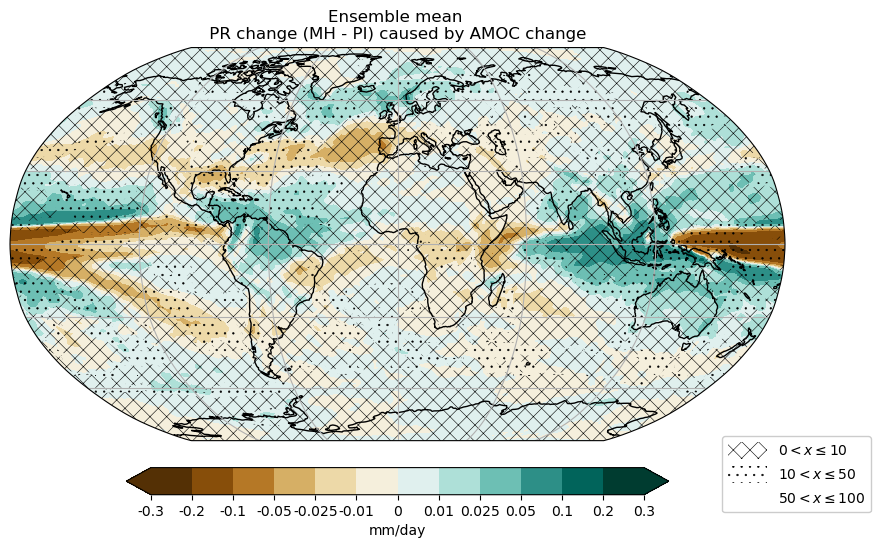

In [66]:
projection = ccrs.Robinson()

transform=ccrs.PlateCarree()
  
#bounds_1 = np.array([-30,-20,-10,-5,-2.5,-1,0,1,2.5,5,10,20,30])*0.01 #np.arange(-0.1,0.11,0.02)
bounds_1  = [-0.3, -0.2, -0.1, -0.05, -0.025, -0.01, 0 , 0.01 , 0.025, 0.05 ,0.1, 0.2 ,0.3] # non-linear levels   
norm_1 = colors.BoundaryNorm(boundaries=bounds_1, ncolors=256)

bounds_2 = [0,10,50,100]
norm_2 = colors.BoundaryNorm(boundaries=bounds_2, ncolors=256)

lat_2 = np.linspace(-90,90,180)
lon_2 = np.linspace(0,360,360)


#fig=plt.subplots(figsize=(10,7))
plt.rcParams["figure.figsize"] = [10, 7]
ax= plt.axes(projection=projection)

ax.coastlines()
ax.gridlines()

ensemble_fig1=ax.contourf(lon_2, lat_2, delta_pr_amoc_ave_1.data , levels=bounds_1,transform=transform, cmap='BrBG', extend='both', norm=norm_1)
cax_2,kw_2 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)

ensemble_fig2=ax.contourf(lon_2, lat_2, 100 *(delta_pr_amoc_ave_1.data / delta_pr_ave.data), levels=bounds_2, hatches=[ 'xx','xx', '..', None,'xx'],  transform=transform, colors='none', extend='both', norm=norm_1)
#cax_2,kw_2 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)

#fig.colorbar(ensemble_fig2)
artists, labels = ensemble_fig2.legend_elements(str_format='{:.0f}'.format) # no decimal places
ax.legend(artists[1:4], labels[1:4], handleheight=1.5, handlelength=2.8, framealpha=1,loc='lower right', bbox_to_anchor=(1.12, -0.2))
plt.rcParams['hatch.linewidth'] = 0.4 #change the transparency of the hatches


cb=plt.colorbar(ensemble_fig1,ticks=bounds_1,cax=cax_2,extend='both',**kw_2, label='mm/day')
cb.set_ticklabels([-0.3, -0.2, -0.1, -0.05, -0.025, -0.01, 0 , 0.01 , 0.025, 0.05 ,0.1, 0.2 ,0.3])
ax.set(title='Ensemble mean \n PR change (MH - PI) caused by AMOC change ')


#hatches=[None, '.', '||', 'xx', None ]